<a href="https://colab.research.google.com/github/metalnom/Colab_01/blob/master/note03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN

# img2col 구현

In [0]:
import numpy as np

def im2col(image, flt_h, flt_w, out_h, out_w):
  img_h, img_w = image.shape

  cols = np.zeros((flt_h*flt_w, out_h*out_w))

  for h in range(out_h):
    h_lim = h + flt_h
    for w in range(out_w):
      w_lim = w + flt_w
      cols[:, h*out_w + w] = image[h:h_lim, w:w_lim].reshape(-1)

  return cols

In [2]:
img = np.array([[1, 2, 3, 4],
               [5, 6, 7, 8],
               [9, 10, 11, 12],
               [13, 14, 15, 16]])
cols = im2col(img, 2, 2, 3, 3)
print(cols)

[[ 1.  2.  3.  5.  6.  7.  9. 10. 11.]
 [ 2.  3.  4.  6.  7.  8. 10. 11. 12.]
 [ 5.  6.  7.  9. 10. 11. 13. 14. 15.]
 [ 6.  7.  8. 10. 11. 12. 14. 15. 16.]]


In [0]:
# 배열 접근을 줄여 속도 향상

import numpy as np

def im2col(image, flt_h, flt_w, out_h, out_w):
  img_h, img_w = image.shape
  cols = np.zeros((flt_h, flt_w, out_h, out_w))

  for h in range(flt_h):
    h_lim = h + out_h
    for w in range(flt_w):
      w_lim = w + out_w
      cols[h, w, :, :] = image[h:h_lim, w:w_lim]
  
  cols = cols.reshape(flt_h*flt_w, out_h*out_w)

  return cols

In [4]:
cols = im2col(img, 2, 2, 3, 3)
print(cols)

[[ 1.  2.  3.  5.  6.  7.  9. 10. 11.]
 [ 2.  3.  4.  6.  7.  8. 10. 11. 12.]
 [ 5.  6.  7.  9. 10. 11. 13. 14. 15.]
 [ 6.  7.  8. 10. 11. 12. 14. 15. 16.]]


# 배치와 채널을 고려한 img2col

In [0]:
def im2col(images, flt_h, flt_w, out_h, out_w):
  n_bt, n_ch, img_h, img_w = images.shape
  cols = np.zeros((n_bt, n_ch, flt_h, flt_w, out_h, out_w))

  for h in range(flt_h):
    h_lim = h + out_h
    for w in range(flt_w):
      w_lim = w + out_w
      cols[:, :, h, w, :, :] = images[:, :, h:h_lim, w:w_lim]
  
  cols = cols.transpose(1, 2, 3, 0, 4, 5).reshape(
      n_ch * flt_h * flt_w, n_bt * out_h * out_w)
  return cols

In [0]:
img = np.array([[[[1, 2, 3, 4],
               [5, 6, 7, 8],
               [9, 10, 11, 12],
               [13, 14, 15, 16]]]])

In [7]:
cols = im2col(img, 2, 2, 3, 3)
print(cols)

[[ 1.  2.  3.  5.  6.  7.  9. 10. 11.]
 [ 2.  3.  4.  6.  7.  8. 10. 11. 12.]
 [ 5.  6.  7.  9. 10. 11. 13. 14. 15.]
 [ 6.  7.  8. 10. 11. 12. 14. 15. 16.]]


# 패딩과 스트라이딩을 고려

In [0]:
def im2col(images, flt_h, flt_w, out_h, out_w, stride, pad):
  n_bt, n_ch, img_h, img_w = images.shape

  img_pad = np.pad(images, [(0, 0), (0, 0), (pad, pad), (pad, pad)], "constant" )
  print("img_pad\n", img_pad)
  cols = np.zeros((n_bt, n_ch, flt_h, flt_w, out_h, out_w))

  for h in range(flt_h):
    h_lim = h + stride*out_h
    for w in range(flt_w):
      w_lim = w + stride*out_w
      cols[:, :, h, w, :, :] = img_pad[:, :, h:h_lim:stride, w:w_lim:stride]
  
  cols = cols.transpose(1, 2, 3, 0, 4, 5).reshape(n_ch*flt_h*flt_w, n_bt*out_h*out_w)
  return cols

In [9]:
cols = im2col(img, 2, 2, 3, 3, 1, 1)
print(cols)

img_pad
 [[[[ 0  0  0  0  0  0]
   [ 0  1  2  3  4  0]
   [ 0  5  6  7  8  0]
   [ 0  9 10 11 12  0]
   [ 0 13 14 15 16  0]
   [ 0  0  0  0  0  0]]]]
[[ 0.  0.  0.  0.  1.  2.  0.  5.  6.]
 [ 0.  0.  0.  1.  2.  3.  5.  6.  7.]
 [ 0.  1.  2.  0.  5.  6.  0.  9. 10.]
 [ 1.  2.  3.  5.  6.  7.  9. 10. 11.]]


# col2img 구현

In [0]:
import numpy as np

def col2im(cols, img_shape, flt_h, flt_w, out_h, out_w, stride, pad):
  n_bt, n_ch, img_h, img_w = img_shape

  cols = cols.reshape(n_ch, flt_h, flt_w, n_bt, out_h, out_w).transpose(3, 0, 1, 2, 4, 5)
  images = np.zeros((n_bt, n_ch, img_h + 2*pad + stride - 1, img_w + 2*pad + stride - 1))

  for h in range(flt_h):
    h_lim = h + stride * out_h
    for w in range(flt_w):
      w_lim = w + stride * out_w
      images[:, :, h:h_lim:stride, w:w_lim:stride] += cols[:, :, h, w, :, :]
  
  return images[:, :, pad:img_h+pad, pad:img_w+pad]

In [11]:
cols = np.ones((4, 4))
img_shape = (1, 1, 3, 3)
images = col2im(cols, img_shape, 2, 2, 2, 2, 1, 0)
print(images)

[[[[1. 2. 1.]
   [2. 4. 2.]
   [1. 2. 1.]]]]


# 콘볼루션층 구현

In [0]:
import numpy as np

class ConvLayer:
  def __init__(self, x_ch, x_h, x_w, n_flt, flt_h, flt_w, stride, pad):
    self.params = (x_ch, x_h, x_w, n_flt, flt_h, flt_w, stride, pad)

    self.w = wb_width * np.random.randn(n_flt, x_ch, flt_h, flt_w)
    self.b = wb_width * np.random.randn(1, n_flt)

    self.y_ch = n_flt
    self.y_h = (x_h - flt_h + 2*pad) // stride + 1
    self.y_w = (x_w - flt_w + 2*pad) // stride + 1

  def forward(self, x):
    n_bt = x.shape[0]
    x_ch, x_h, x_w, n_flt, flt_h, flt_w, stride, pad = self.params
    y_ch, y_h, y_w = self.y_ch, self.y_h, self.y_w

    self.cols = im2col(x, flt_h, flt_w, y_h, y_w, stride, pad)
    self.w_col = self.w.reshape(n_flt, x_ch*flt_h*flt_w)

    u = np.dot(self.w_col, self.cols).T + self.b
    self.u = u.reshape(n_bt, y_h, y_w, y_ch).transpose(0, 3, 1, 2)
    self.y = np.where(self.u <= 0, 0, self.u)

  def backward(self, grad_y):
    n_bt = grad_y.shape[0]
    x_ch, x_h, x_w, n_flt, flt_h, flt_w, stride, pad = self.params
    y_ch, y_h, y_w = self.y_ch, self.y_h, self.y_w

    delta = grad_y * np.where(self.u <=0, 0, 1)
    delta = delta.transpose(0, 2, 3, 1).reshape(n_bt * y_h * y_w, y_ch)

    grad_w = np.dot(self.cols, delta)
    self.grad_w = grad_w.T.reshape(n_flt, x_ch, flt_h, flt_w)
    self.grad_b = np.sum(delta, axis=0)

    grad_cols = np.dot(delta, self.w_col)
    x_shape = (n_bt, x_ch, x_h, x_w)
    self.grad_x = col2im(grad_cols.T, x_shape, flt_h, flt_w, y_h, y_w, stride, pad)

# 풀링층 구현

In [0]:
class PoolingLayer:
  def __init__(self, x_ch, x_h, x_w, pool, pad):
    self.params = (x_ch, x_h, x_w, pool, pad)
    self.y_ch = x_ch
    self.y_h = x_h//pool if x_h%pool==0 else x_h//pool+1
    self.y_w = x_w//pool if x_w%pool==0 else x_w//pool+1

  def forward(self, x):
    n_bt = x.shape[0]
    x_ch, x_h, x_w, pool, pad = self.params
    y_ch, y_h, y_w = self.y_ch, self.y_h, self.y_w
    
    cols = im2col(x, pool, pool, y_h, y_w, pool, pad)
    cols = cols.T.reshape(n_bt*y_h*y_w*x_ch, pool*pool)

    y = np.max(cols, axis=1)
    self.y = y.reshape(n_bt, y_h, y_w, x_ch).transpose(0, 3, 1, 2)

    self.max_index = np.argmax(cols, axis=1)

  def backward(self, grad_y):
    n_bt = grad_y.shape[0]
    x_ch, x_h, x_w, pool, pad = self.params
    y_ch, y_h, y_w = self.y_ch, self.y_h, self.y_w

    grad_y = grad_y.transpose(0, 2, 3, 1)

    grad_cols = np.zeros((pool*pool, grad_y.size))
    grad_cols[self.max_index.reshape(-1), np.arange(grad_y.size)] = grad_y.reshape(-1)
    grad_cols = grad_cols.reshape(pool, pool, n_bt, y_h, y_w, y_ch)
    grad_cols = grad_cols.transpose(5, 0, 1, 2, 3, 4)
    grad_cols = grad_cols.reshape(y_ch*pool*pool, n_bt*y_h*y_w)

    x_shape = (n_bt, x_ch, x_h, x_w)
    self.grad_x = col2im(grad_cols, x_shape, pool, pool, y_h, y_w, pool, pad)

# 전결합층 구현

In [0]:
class BaseLayer:
  def __init__(self, n_upper, n):
    self.w = wb_width * np.random.randn(n_upper, n)
    self.b = wb_width * np.random.randn(n)

  def update(self, eta):
    self.w -= eta * self.grad_w
    self.b -= eta * self.grad_b

In [0]:
class MiddleLayer(BaseLayer):
  def forward(self, x):
    self.x = x
    self.u = np.dot(x, self.w) + self.b
    self.y = np.where(self.u <= 0, 0, self.u)

  def backward(self, grad_y):
    delta = grad_y * np.where(self.u <= 0, 0, 1)
    self.grad_w = np.dot(self.x.T, delta)
    self.grad_b = np.sum(delta, axis=0)
    self.grad_x = np.dot(delta, self.w.T)


class OutputLayer(BaseLayer):
  def forward(self, x):
    self.x = x
    u = np.dot(x, self.w) + self.b
    self.y = np.exp(u)/np.sum(np.exp(u), axis=1).reshape(-1)

  def backward(self, t):
    delta = self.y - t
    self.grad_w = np.dot(self.x.T, delta)
    self.grad_b = np.sum(delta, axis=0)
    self.grad_x = np.dot(delta, self.w.T)

# 데이터셋 로드

(1797, 64)


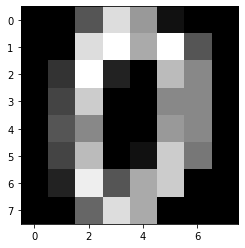

In [16]:
import matplotlib.pyplot as plt
from sklearn import datasets

digits = datasets.load_digits()
print(digits.data.shape)

plt.imshow(digits.data[0].reshape(8, 8), cmap="gray")
plt.show()

In [18]:
print(digits.target.shape)
print(digits.target[:50])

(1797,)
[0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 9 5 5 6 5 0
 9 8 9 8 4 1 7 7 3 5 1 0 0]


In [113]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


# CNN 코드

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

digits_data = datasets.load_digits()
input_data = digits_data.data
correct = digits_data.target
n_data = len(correct)

ave_input = np.average(input_data)
std_input = np.std(input_data)
input_data = (input_data - ave_input) / std_input

correct_data = np.zeros((n_data, 10))

for i in range(n_data):
  correct_data[i, correct[i]] = 1.0

index = np.arange(n_data)
index_train = index[index%3 != 0]
index_test = index[index%3 == 0]

input_train = input_data[index_train, :]
correct_train = correct_data[index_train, :]
input_test = input_data[index_test, :]
correct_test = correct_data[index_test, :]

n_train = input_train.shape[0]
n_test = input_train.shape[0]

In [0]:
img_h = 8
img_w = 8
img_ch = 1

wb_width = 0.1
eta = 0.01
epoch = 50
batch_size = 8
interval = 10
n_sample = 200

In [0]:
def im2col(images, flt_h, flt_w, out_h, out_w, stride, pad):
  n_bt, n_ch, img_h, img_w = images.shape
  img_pad = np.pad(images, [(0, 0), (0, 0), (pad, pad), (pad, pad)], "constant")
  cols = np.zeros((n_bt, n_ch, flt_h, flt_w, out_h, out_w))

  for h in range(flt_h):
    h_lim = h + stride*out_h
    for w in range(flt_w):
      w_lim = w + stride*out_w
      cols[:, :, h, w, :, :] = img_pad[:, :, h:h_lim:stride, w:w_lim:stride]

  cols = cols.transpose(1, 2, 3, 0, 4, 5).reshape(n_ch*flt_h*flt_w, n_bt*out_h*out_w)
  return cols

def col2im(cols, img_shape, flt_h, flt_w, out_h, out_w, stride, pad):
  n_bt, n_ch, img_h, img_w = img_shape
  cols = cols.reshape(n_ch, flt_h, flt_w, n_bt, out_h, out_w).transpose(3, 0, 1, 2, 4, 5)
  images = np.zeros((n_bt, n_ch, img_h+2*pad+stride-1, img_w+2*pad+stride-1))

  for h in range(flt_h):
    h_lim = h + stride*out_h
    for w in range(flt_w):
      w_lim = w + stride*out_w
      images[:, :, h:h_lim:stride, w:w_lim:stride] += cols[:, :, h, w, :, :]
  
  return images[:, :, pad:img_h+pad, pad:img_w+pad]

In [0]:
class ConvLayer:
  def __init__(self, x_ch, x_h, x_w, n_flt, flt_h, flt_w, stride, pad):
    self.params = (x_ch, x_h, x_w, n_flt, flt_h, flt_w, stride, pad)
    self.w = wb_width * np.random.randn(n_flt, x_ch, flt_h, flt_w)
    self.b = wb_width * np.random.randn(1, n_flt)
    self.y_ch = n_flt
    self.y_h = (x_h - flt_h + 2*pad) // stride + 1
    self.y_w = (x_w - flt_w + 2*pad) // stride + 1

    self.h_w = np.zeros((n_flt, x_ch, flt_h, flt_w)) + 1e-8
    self.h_b = np.zeros((1, n_flt)) + 1e-8

  def forward(self, x):
    n_bt = x.shape[0]
    x_ch, x_h, x_w, n_flt, flt_h, flt_w, stride, pad = self.params
    y_ch, y_h, y_w = self.y_ch, self.y_h, self.y_w

    self.cols = im2col(x, flt_h, flt_w, y_h, y_w, stride, pad)
    self.w_col = self.w.reshape(n_flt, x_ch*flt_h*flt_w)

    u = np.dot(self.w_col, self.cols).T + self.b
    self.u = u.reshape(n_bt, y_h, y_w, y_ch).transpose(0, 3, 1, 2)
    self.y = np.where(self.u <= 0, 0, self.u)

  def backward(self, grad_y):
    n_bt = grad_y.shape[0]
    x_ch, x_h, x_w, n_flt, flt_h, flt_w, stride, pad = self.params
    y_ch, y_h, y_w = self.y_ch, self.y_h, self.y_w

    delta = grad_y * np.where(self.u <= 0, 0, 1)
    delta = delta.transpose(0, 2, 3, 1).reshape(n_bt*y_h*y_w, y_ch)

    grad_w = np.dot(self.cols, delta)
    self.grad_w = grad_w.T.reshape(n_flt, x_ch, flt_h, flt_w)
    self.grad_b = np.sum(delta, axis=0)

    grad_cols = np.dot(delta, self.w_col)
    x_shape = (n_bt, x_ch, x_h, x_w)
    self.grad_x = col2im(grad_cols.T, x_shape, flt_h, flt_w, y_h, y_w, stride, pad)

  def update(self, eta):
    self.h_w += self.grad_w * self.grad_w
    self.w -= eta / np.sqrt(self.h_w) * self.grad_w
    self.h_b += self.grad_b * self.grad_b
    self.b -= eta / np.sqrt(self.h_b) * self.grad_b 

In [0]:
class PoolingLayer:
  def __init__(self, x_ch, x_h, x_w, pool, pad):
    self.params = (x_ch, x_h, x_w, pool, pad)
    self.y_ch = x_ch
    self.y_h = x_h// pool if x_h%pool==0 else x_h//pool + 1
    self.y_w = x_w//pool if x_w%pool==0 else x_w//pool + 1

  def forward(self, x):
    n_bt = x.shape[0]
    x_ch, x_h, x_w, pool, pad = self.params
    y_ch, y_h, y_w = self.y_ch, self.y_h, self.y_w

    cols = im2col(x, pool, pool, y_h, y_w, pool, pad)
    cols = cols.T.reshape(n_bt*y_h*y_w*x_ch, pool*pool)

    y = np.max(cols, axis=1)
    self.y = y.reshape(n_bt, y_h, y_w, x_ch).transpose(0, 3, 1, 2)

    self.max_index = np.argmax(cols, axis=1)

  def backward(self, grad_y):
    n_bt = grad_y.shape[0]
    x_ch, x_h, x_w, pool, pad = self.params
    y_ch, y_h, y_w = self.y_ch, self.y_h, self.y_w

    grad_y = grad_y.transpose(0, 2, 3, 1)

    grad_cols = np.zeros((pool*pool, grad_y.size))

    grad_cols[self.max_index.reshape(-1), np.arange(grad_y.size)] = grad_y.reshape(-1)
    grad_cols = grad_cols.reshape(pool, pool, n_bt, y_h, y_w, y_ch)
    grad_cols = grad_cols.transpose(5, 0, 1, 2, 3, 4)
    grad_cols = grad_cols.reshape(y_ch*pool*pool, n_bt*y_h*y_w)

    x_shape = (n_bt, x_ch, x_h, x_w)
    self.grad_x = col2im(grad_cols, x_shape, pool, pool, y_h, y_w, pool, pad)


In [0]:
class BaseLayer:
  def __init__(self, n_upper, n):
    self.w = wb_width * np.random.randn(n_upper, n)
    self.b = wb_width * np.random.randn(n)

    self.h_w = np.zeros((n_upper, n)) + 1e-8
    self.h_b = np.zeros(n) + 1e-8

  def update(self, eta):
    self.h_w += self.grad_w * self.grad_w
    self.w -= eta / np.sqrt(self.h_w) * self.grad_w
    self.h_b += self.grad_b * self.grad_b
    self.b -= eta / np.sqrt(self.h_b) * self.grad_b

In [0]:
class MiddleLayer(BaseLayer):
  def forward(self, x):
    self.x = x
    self.u = np.dot(x, self.w) + self.b
    self.y = np.where(self.u <= 0, 0, self.u)

  def backward(self, grad_y):
    delta = grad_y * np.where(self.u <= 0, 0, 1)
    self.grad_w = np.dot(self.x.T, delta)
    self.grad_b = np.sum(delta, axis=0)
    self.grad_x = np.dot(delta, self.w.T)

class OutputLayer(BaseLayer):
  def forward(self, x):
    self.x = x
    u = np.dot(x, self.w) + self.b
    self.y = np.exp(u)/np.sum(np.exp(u), axis=1).reshape(-1, 1)

  def backward(self, t):
    delta = self.y - t
    self.grad_w = np.dot(self.x.T, delta)
    self.grad_b = np.sum(delta, axis=0)
    self.grad_x = np.dot(delta, self.w.T)


class Dropout:
  def __init__(self, dropout_ratio):
    self.dropout_ratio = dropout_ratio
  
  def forward(self, x, is_train):
    if is_train:
      rand = np.random.rand(*x.shape)
      self.dropout = np.where(rand > self.dropout_ratio, 1, 0)
      self.y = x * self.dropout
    else:
      self.y = (1-self.dropout_ratio)*x
  
  def backward(self, grad_y):
    self.grad_x = grad_y * self.dropout

# CNN 구축

In [0]:
cl_1 = ConvLayer(img_ch, img_h, img_w, 10, 3, 3, 1, 1)
cl_2 = ConvLayer(cl_1.y_ch, cl_1.y_h, cl_1.y_w, 10, 3, 3, 1, 1)
pl_1 = PoolingLayer(cl_2.y_ch, cl_2.y_h, cl_2.y_w, 2, 0)

n_fc_in = pl_1.y_ch * pl_1.y_h * pl_1.y_w
ml_1 = MiddleLayer(n_fc_in, 200)
dr_1 = Dropout(0.5)

ml_2 = MiddleLayer(200, 200)
dr_2 = Dropout(0.5)

ol_1 = OutputLayer(200, 10)


def forward_propagation(x, is_train):
  n_bt = x.shape[0]

  images = x.reshape(n_bt, img_ch, img_h, img_w)
  cl_1.forward(images)
  cl_2.forward(cl_1.y)
  pl_1.forward(cl_2.y)

  fc_input = pl_1.y.reshape(n_bt, -1)
  ml_1.forward(fc_input)
  dr_1.forward(ml_1.y, is_train)
  ml_2.forward(dr_1.y)
  dr_2.forward(ml_2.y, is_train)
  ol_1.forward(dr_2.y)

def backward_propagation(t):
  n_bt = t.shape[0]

  ol_1.backward(t)
  dr_2.backward(ol_1.grad_x)
  ml_2.backward(dr_2.grad_x)
  dr_1.backward(ml_2.grad_x)
  ml_1.backward(dr_1.grad_x)

  grad_img = ml_1.grad_x.reshape(n_bt, pl_1.y_ch, pl_1.y_h, pl_1.y_w)
  pl_1.backward(grad_img)
  cl_2.backward(pl_1.grad_x)
  cl_1.backward(cl_2.grad_x)

def update_wb():
  cl_1.update(eta)
  cl_2.update(eta)
  ml_1.update(eta)
  ml_2.update(eta)
  ol_1.update(eta)

def get_error(t, batch_size):
  return -np.sum(t * np.log(ol_1.y + 1e-7)) / batch_size

def forward_sample(inp, correct, n_sample):
  index_rand = np.arange(len(correct))
  np.random.shuffle(index_rand)
  index_rand = index_rand[:n_sample]
  x = inp[index_rand, :]
  t = correct[index_rand, :]
  forward_propagation(x, False)
  return x, t

# CNN 학습


Epoch: 0/50 Error_train: 2.305124744624834 Error_test: 2.3203946835748948
Epoch: 10/50 Error_train: 0.042241505980091174 Error_test: 0.09461295539247748
Epoch: 20/50 Error_train: 0.02716474038059781 Error_test: 0.06540977983796188
Epoch: 30/50 Error_train: 0.016411575383529907 Error_test: 0.018780682564925898
Epoch: 40/50 Error_train: 0.008476292914064217 Error_test: 0.06738823151397776


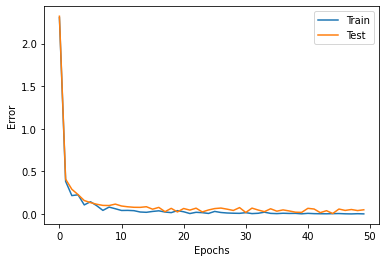

Accuracy Train:  99.91652754590984% Accuracy Test:  49.165275459098496%


In [132]:
train_error_x = []
train_error_y = []
test_error_x = []
test_error_y = []

n_batch = n_train // batch_size
for i in range(epoch):
  x, t = forward_sample(input_train, correct_train, n_sample)
  error_train = get_error(t, n_sample)

  x, t = forward_sample(input_test, correct_test, n_sample)
  error_test = get_error(t, n_sample)

  train_error_x.append(i)
  train_error_y.append(error_train)
  test_error_x.append(i)
  test_error_y.append(error_test)

  if i%interval == 0:
    print("Epoch: " + str(i) + "/" + str(epoch),
          "Error_train: " + str(error_train),
          "Error_test: " + str(error_test))
    
  index_rand = np.arange(n_train)
  np.random.shuffle(index_rand)
  for j in range(n_batch):
    mb_index = index_rand[j*batch_size : (j+1)*batch_size]
    x = input_train[mb_index, :]
    t = correct_train[mb_index, :]

    forward_propagation(x, True)
    backward_propagation(t)
    update_wb()


plt.plot(train_error_x, train_error_y, label="Train")
plt.plot(test_error_x, test_error_y, Label="Test")
plt.legend()

plt.xlabel("Epochs")
plt.ylabel("Error")

plt.show()

x, t = forward_sample(input_train, correct_train, n_train)
count_train = np.sum(np.argmax(ol_1.y, axis=1) == np.argmax(t, axis=1))

x, t = forward_sample(input_test, correct_test, n_test)
count_test = np.sum(np.argmax(ol_1.y, axis=1) == np.argmax(t, axis=1))

print("Accuracy Train: ", str(count_train/n_train*100) + "%",
      "Accuracy Test: ", str(count_test/n_test*100) + "%")